# Método PWLSR - dD e d18O em chuvas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

In [5]:
# Função usada adiante na plotagem da reta:
def reta(x,a,b):
    y = a*x + b
    return y

In [2]:
# Importação do dataset com as medidas:

data = pd.read_csv('../data/sp_norte.csv')

In [3]:
data.head()

,amostra,d18O,d2H,prec
0,1,-3.9,-33,100.7
1,2,-4.4,-32,195.0
2,3,-6.7,-49,204.7
3,4,-7.8,-59,464.7
4,5,-4.6,-34,97.5


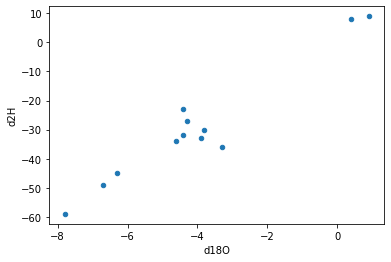

In [30]:
data.plot(x ='d18O', y='d2H', kind = 'scatter')
plt.show()

In [4]:
data.shape

(12, 4)

In [16]:
X = data['d18O'].values
Y = data['d2H'].values
P = data['prec'].values

In [17]:
# Número de amostras:
N = len(data)

In [18]:
sum_p = sum_x = sum_y = 0
sum_p2 = sum_x2 = sum_y2 = 0
sum_px = sum_py = sum_pxy = 0
sum_px2 = sum_py2 = 0
for i in range(N):   
    sum_p += P[i]                  # Σ p_i
    sum_x += X[i]                  # Σ x_i
    sum_y += Y[i]                  # Σ y_i  
    sum_p2 += (P[i])**2            # Σ (p_i)^2
    sum_x2 += (X[i])**2            # Σ (x_i)^2
    sum_y2 += (Y[i])**2            # Σ (y_i)^2
    sum_px += P[i]*X[i]            # Σ p_i*x_i
    sum_py += P[i]*Y[i]            # Σ p_i*y_i
    sum_pxy += P[i]*X[i]*Y[i]      # Σ p_i*x_i*y_i
    sum_px2 += P[i]*((X[i])**2)    # Σ p_i*(x_i)^2
    sum_py2 += P[i]*((Y[i])**2)    # Σ p_i*(y_i)^2 

In [19]:
# RETA METEÓRICA (d2H = a*d18O + b):

# Coeficientes a e b:

a = (sum_pxy - (sum_px*sum_py/sum_p))/(sum_px2 - ((sum_px**2)/sum_p))
b = (sum_py - a*(sum_px))/(sum_p)

In [20]:
# Erro padrão:

S_yx = ((N/(N-2))*(sum_py2 - b*sum_py - a*sum_pxy)/sum_p)**0.5

In [21]:
# Desvio padrão de a:

desv_a = S_yx/(((N/sum_p)*(sum_px2 - (((sum_px)**2)/sum_p)))**0.5)

In [22]:
# Desvio padrão de b:

desv_b = S_yx*(((sum_px2)/(N*(sum_px2 - (((sum_px)**2)/sum_p))))**0.5)

In [23]:
# Correlação:

num = (sum_pxy - (sum_px*sum_py/sum_p))**2
den = (sum_px2 - ((sum_px**2)/sum_p))*(sum_py2 - ((sum_py**2)/sum_p))
r_2 = num/den

In [24]:
# EFEITO QUANTIDADE PARA O OXIGÊNIO-18 (d18O vs. prec):

# Coeficientes a_18 e b_18 da reta d18O = a_18*p + b_18  (usando o método LSF p/ a reta e a correlação)

a_18 = (sum_px - (sum_p*sum_x/N))/(sum_p2 - ((sum_p**2)/N))
b_18 = (sum_x/N) - a_18*(sum_p/N)

num_18 = (sum_px - (sum_p*sum_x/N))**2
den_18 = (sum_p2 - ((sum_p**2)/N))*(sum_x2 - ((sum_x**2)/N))
r_18 = num_18/den_18

In [25]:
# EFEITO QUANTIDADE PARA O DEUTÉRIO (d2H vs. prec):

# coeficientes a_D e b_D da reta d2H = a_D*p + b_D      (usando o método LSF p/ a reta e a correlação)

a_D = (sum_py - (sum_p*sum_y/N))/(sum_p2 - ((sum_p**2)/N))
b_D = (sum_y/N) - a_D*(sum_p/N)

num_D = (sum_py - (sum_p*sum_y/N))**2
den_D = (sum_p2 - ((sum_p**2)/N))*(sum_y2 - ((sum_y**2)/N))
r_D = num_D/den_D

In [26]:
# devolvendo os coeficientes para a reta e o de correlação:

print("a = ", "%.2f"%a)
print("b = ", "%.2f"%b)
print("erro padrão = ","%.2f"%S_yx)
print("desv_a =", "%.2f"%desv_a)
print("desv_b = ", "%.2f"%desv_b)
print("correlação = ", "%.3f"%r_2)
print("d2H = ", "%.2f"%a,".d18O + ", "%.2f"%b)

a =  7.44
b =  0.08
erro padrão =  4.37
desv_a = 0.72
desv_b =  4.33
correlação =  0.914
d2H =  7.44 .d18O +  0.08


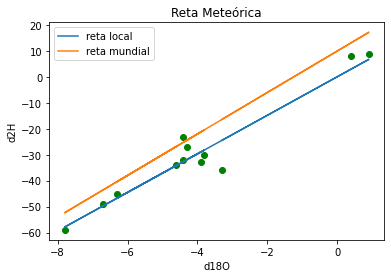

In [27]:
# plotagem da reta meteórica:
plt.plot(X, Y, 'go')
plt.plot(X, reta(X,a,b), label = r'reta local')
plt.plot(X, reta(X,8,10), label = r'reta mundial')
plt.xlabel("d18O")
plt.ylabel("d2H")
plt.title("Reta Meteórica")
plt.legend()
plt.show()

correlação =  0.612
d18O =  -0.02 .p +  -1.91


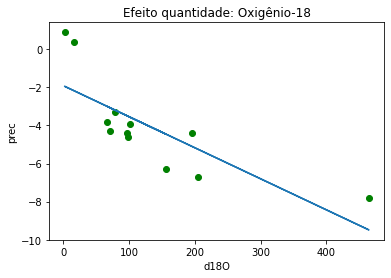

In [28]:
print("correlação = ", "%.3f"%r_18)
print("d18O = ", "%.2f"%a_18,".p + ", "%.2f"%b_18)

plt.plot(P, X, 'go')
plt.plot(P, reta(P,a_18,b_18))
plt.xlabel("d18O")
plt.ylabel("prec")
plt.title("Efeito quantidade: Oxigênio-18")
plt.show()  

correlação =  0.584
d2H =  -0.13 .p +  -12.95


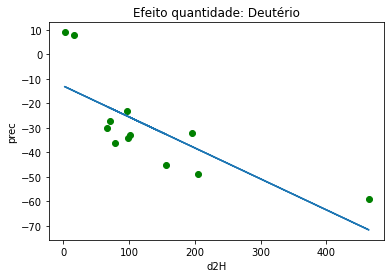

In [29]:
print("correlação = ", "%.3f"%r_D)
print("d2H = ", "%.2f"%a_D,".p + ", "%.2f"%b_D)

plt.plot(P, Y, 'go')
plt.plot(P, reta(P,a_D, b_D))
plt.xlabel("d2H")
plt.ylabel("prec")
plt.title("Efeito quantidade: Deutério")
plt.show()

d18O float64


C:\Users\Mardonio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


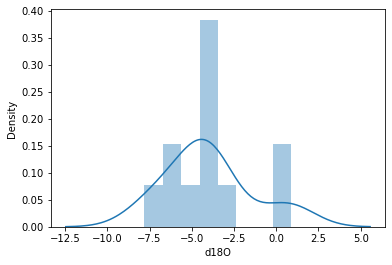

d2H int64


C:\Users\Mardonio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


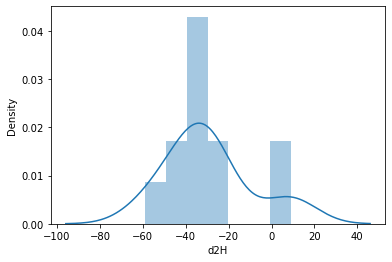

In [42]:
i = 0
n = len(data.columns)
for col in data.columns:
    if (i>0) and (i!=(n-1)) and (data.dtypes[i] != 'object'):
        print(col,data.dtypes[i])    
        sns_plot = sns.distplot(data[col])  
        plt.show()

    i = i + 1

In [43]:
df = data

C:\Users\Mardonio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mardonio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


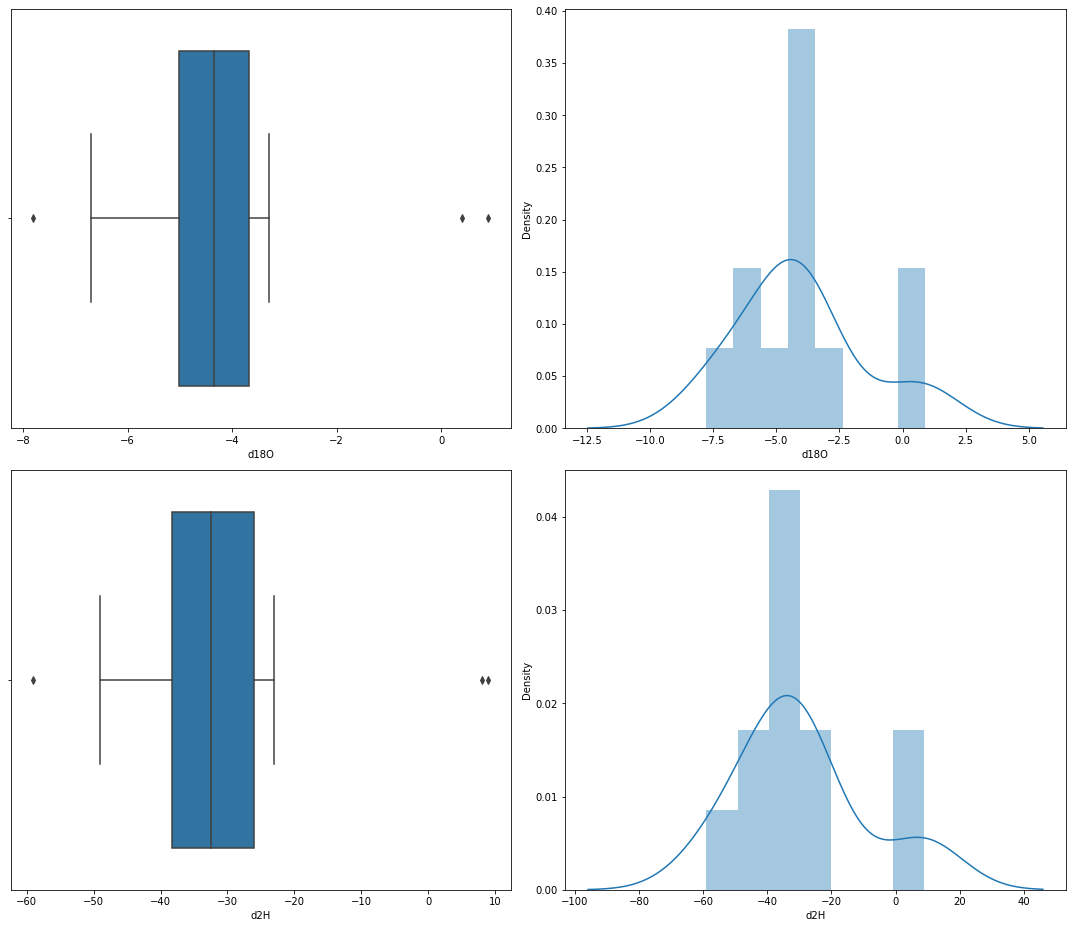

In [53]:
fig, ax = plt.subplots(2, 2, figsize = (15, 13))
sns.boxplot(x= df["d18O"], ax = ax[0,0])
sns.distplot(df["d18O"], ax = ax[0,1])

sns.boxplot(x= df["d2H"], ax = ax[1,0])
sns.distplot(df["d2H"], ax = ax[1,1])

plt.tight_layout()